## Simple `sinc` example

This notebook shows how to fit a simple $sinc$ variant with our BNN 
and visualize the results. 

In [12]:
% matplotlib notebook
import sys
sys.path.insert(0, "../../../")

import numpy as np
import matplotlib.pyplot as plt

from pysgmcmc.models.architectures import simple_tanh_network
from pysgmcmc.models.bayesian_neural_network import BayesianNeuralNetwork
from pysgmcmc.optimizers.sgld import SGLD
from pysgmcmc.optimizers.sghmc import SGHMC


def fit_bnn(optimizer=SGHMC, num_training_datapoints=20, 
            lr=1e-2, num_burn_in_steps=3000,
            num_steps=13000, keep_every=100,
            network_architecture=simple_tanh_network):
    
    input_dimensionality = 1
    x_train = np.array([
        np.random.uniform(np.zeros(1), np.ones(1), input_dimensionality)
        for _ in range(num_training_datapoints)
    ])
    y_train = np.sinc(x_train * 10 - 5).sum(axis=1)

    x_test = np.linspace(0, 1, 100)[:, None]
    y_test = np.sinc(x_test * 10 - 5).sum(axis=1)

    bnn = BayesianNeuralNetwork(optimizer=optimizer, lr=lr)

    prediction, variance_prediction = bnn.train(x_train, y_train).predict(x_test)

    prediction_std = np.sqrt(variance_prediction)

    plt.figure()
    plt.grid()

    plt.plot(x_test[:, 0], y_test, label="true", color="black")
    plt.plot(x_train[:, 0], y_train, "ro")

    plt.plot(x_test[:, 0], prediction, label=optimizer.__name__, color="blue")
    plt.fill_between(x_test[:, 0], prediction + prediction_std, prediction - prediction_std, alpha=0.2, color="indianred")
    plt.legend()



INFO:root:Performing 13000 iterations
INFO:root:Progress bar enabled. To disable pass `logging_configuration={level: debug.WARN}`.
13000/13000[██████████] - 00:00 - , NLL: 294.4358825683594 - MSELoss: 0.20250172913074493    


<IPython.core.display.Javascript object>


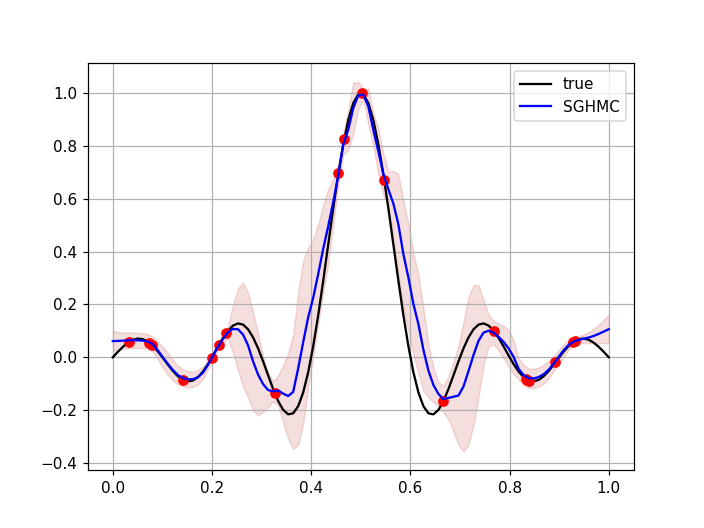

In [13]:
fit_bnn(optimizer=SGHMC, lr=1e-2)

INFO:root:Performing 13000 iterations
INFO:root:Progress bar enabled. To disable pass `logging_configuration={level: debug.WARN}`.
13000/13000[██████████] - 00:00 - , NLL: 76.88319396972656 - MSELoss: 0.005371000152081251 


<IPython.core.display.Javascript object>


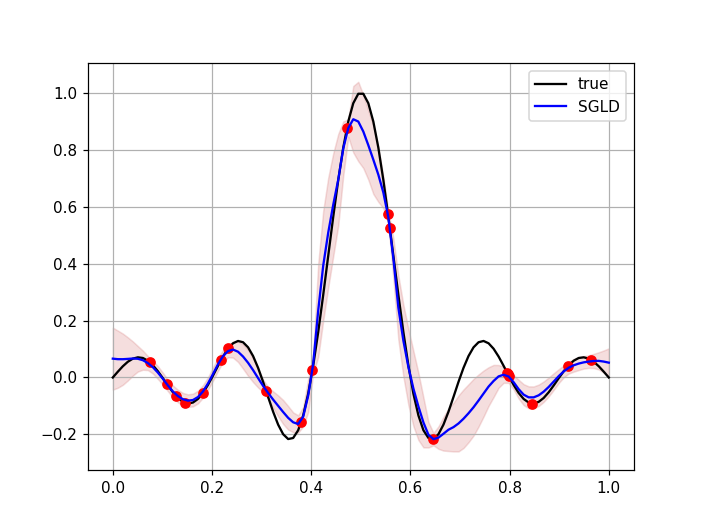

In [15]:
fit_bnn(optimizer=SGLD, lr=1e-3)